In [142]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, make_scorer, f1_score, accuracy_score

In [143]:
Post_selected = pd.read_csv('~/Desktop/Feat_prediction.csv').set_index('External ID')

In [144]:
Post_selected

,BMI,CRP (mg/L),ESR (mm/hr),Height,Total Reads,Weight,Weight_n,consent_age,fecalcal,fecalcal_ng_ml,...,Bowel frequency during the day_09-Jul,Bowel frequency during the day_Unknown,sex_Female,sex_Male,sex_Unknown,smoking status_Current smoker,smoking status_Former smoker,smoking status_Never smoked,smoking status_Unknown,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM5FZ4MM,16.945470,9.597698,98.184831,192.000000,5.524543e+07,112.0,24.000000,37.000000,240.090243,19.888863,...,0,0,1,0,0,0,0,1,0,UC
CSM5FZ4MM1,16.456143,40.320708,20.960983,152.000000,3.786562e+07,70.0,53.000000,58.000000,223.285885,317.063094,...,0,0,1,0,0,0,0,0,1,UC
CSM5MCUOM,15.711854,48.569000,36.625684,144.313066,2.553641e+05,64.0,116.000000,67.000000,222.001161,68.541729,...,0,0,0,1,0,0,0,0,1,UC
CSM5MCUOM1,31.439759,11.180201,12.256574,143.666757,6.052792e+06,86.0,98.000000,18.000000,343.835485,175.609929,...,0,0,0,1,0,0,0,0,1,UC
CSM5MCWQM,39.813988,54.326659,28.496137,164.418809,1.043272e+07,103.0,28.000000,43.000000,194.991146,248.368993,...,0,0,0,0,1,0,0,0,1,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSMB4MBSM1,25.104382,0.840428,44.057621,169.000000,5.611575e+07,92.0,77.528729,32.000000,194.538209,59.287025,...,0,0,0,1,0,0,0,1,0,CD
PSMB4MC5M,16.327456,13.047489,91.892652,167.000000,5.457551e+07,19.0,31.000000,25.000000,420.326372,138.643638,...,0,1,1,0,0,0,0,1,0,UC
PSMB4MC5M1,36.369043,9.849275,45.065309,118.000000,1.777290e+07,77.0,94.000000,49.000000,153.919317,391.352492,...,0,0,0,0,1,0,0,1,0,UC


In [145]:
Feature = Post_selected.iloc[:,:255]
Target = Post_selected.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size=0.33, random_state=42)


In [146]:
# feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [147]:
# feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/

Best Model:
DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=3,
                       min_samples_split=3, random_state=0)


<AxesSubplot:>

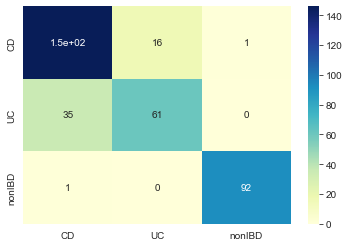

In [178]:
min_samples_split_DT = [3,4,5,6,7,8,9]
min_samples_leaf_DT = [3,4,5,6,7,8,9]
max_depth_DT = [3,4,5,6,7,8,9,10]
max_features_DT = ['sqrt', 'log2', None, 1, 2, 3, 4, 5]

parameters_DT = {#'max_features':max_features_DT,
                'min_samples_split': min_samples_split_DT,
                 'max_depth': max_depth_DT,
                'min_samples_leaf': min_samples_leaf_DT
                }

DT_model = DecisionTreeClassifier(random_state = 0, class_weight="balanced")
DT_clf = GridSearchCV(DT_model, parameters_DT, cv=5, scoring='roc_auc')
DT_clf.fit(X_train, y_train)

print("Best Model:")
DT_model = DT_clf.best_estimator_
print(DT_model)

DT_predictions = DT_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_DT = confusion_matrix(y_test, DT_predictions,labels=labels)
cm_DT = pd.DataFrame(cm_DT, index=labels, columns=labels)
sns.heatmap(cm_DT, cmap="YlGnBu", annot=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Best Model:
LogisticRegression(C=0.1, class_weight='balanced', random_state=0)


<AxesSubplot:>

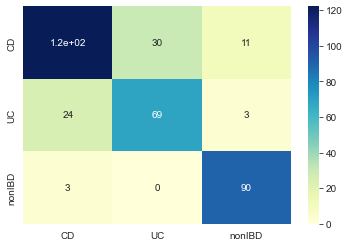

In [180]:
penalty_list_LR = ['l1','l2']
regularization_list_LR = [i for i in np.logspace(-4,2,15)]
parameters_LR = {'penalty':penalty_list_LR,
                'C': regularization_list_LR}

LR_model = LogisticRegression(class_weight = 'balanced')
LR_clf = GridSearchCV(LR_model, parameters_LR, cv=5, scoring="accuracy")

LR_model = LogisticRegression(random_state = 0, class_weight="balanced")
LR_clf = GridSearchCV(LR_model, parameters_LR, cv=5, scoring='accuracy')
LR_clf.fit(X_train, y_train)

print("Best Model:")
LR_model = LR_clf.best_estimator_
print(LR_model)

LR_predictions = LR_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_LR = confusion_matrix(y_test, LR_predictions,labels=labels)
cm_LR = pd.DataFrame(cm_LR, index=labels, columns=labels)
sns.heatmap(cm_LR, cmap="YlGnBu", annot=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/

Best Model:
GaussianNB(var_smoothing=1e-12)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/

<AxesSubplot:>

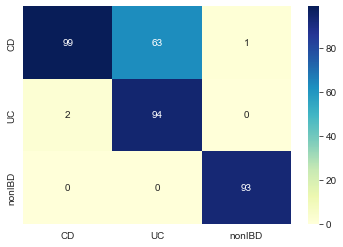

In [181]:
from sklearn.naive_bayes import GaussianNB

var_smooth_NB = [i for i in np.logspace(-12,-6,20)]

parameters_NB = {'var_smoothing':var_smooth_NB}

NB_model = GaussianNB()
NB_clf = GridSearchCV(NB_model, parameters_NB, cv=5, scoring="roc_auc")

NB_clf.fit(X_train, y_train)

print("Best Model:")
NB_model = NB_clf.best_estimator_
print(NB_model)

NB_predictions = NB_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_NB = confusion_matrix(y_test, NB_predictions,labels=labels)
cm_NB = pd.DataFrame(cm_NB, index=labels, columns=labels)
sns.heatmap(cm_NB, cmap="YlGnBu", annot=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} f

Best Model:
LinearSVC(C=0.0001, class_weight='balanced', multi_class='crammer_singer',
          penalty='l1')


<AxesSubplot:>

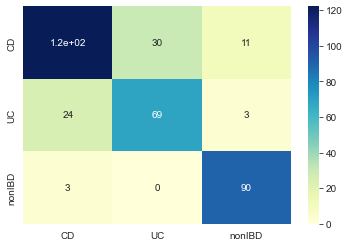

In [182]:
penalty_list_SVM = ['l1','l2']
regularization_list_SVM = [i for i in np.logspace(-4,-1,15)]
parameters_SVM = {'penalty':penalty_list_SVM,
                'C': regularization_list_SVM}

SVM_model = LinearSVC(class_weight = 'balanced', multi_class="crammer_singer")
SVM_clf = GridSearchCV(SVM_model, parameters_SVM, cv=5, scoring="roc_auc")

SVM_clf.fit(X_train, y_train)

print("Best Model:")
SVM_model = SVM_clf.best_estimator_
print(SVM_model)

SVM_predictions = SVM_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_SVM = confusion_matrix(y_test, SVM_predictions,labels=labels)
cm_SVM = pd.DataFrame(cm_SVM, index=labels, columns=labels)
sns.heatmap(cm_LR, cmap="YlGnBu", annot=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/

Best Model:
KNeighborsClassifier(n_neighbors=2)


<AxesSubplot:>

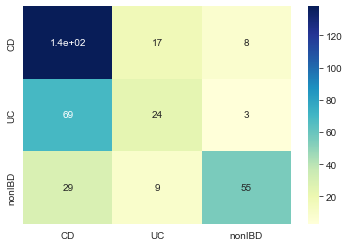

In [183]:
nneighbors_KNN = [i+2 for i in range(10)]
weights_list_KNN = ['uniform', 'distance']
parameters_KNN = {'n_neighbors':nneighbors_KNN,
                'weights': weights_list_KNN}
KNN_model = KNeighborsClassifier()
KNN_clf = GridSearchCV(KNN_model, parameters_KNN, cv=5, scoring="roc_auc")

KNN_clf.fit(X_train, y_train)

print("Best Model:")
KNN_model = KNN_clf.best_estimator_
print(KNN_model)

KNN_predictions = KNN_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_KNN = confusion_matrix(y_test, KNN_predictions,labels=labels)
cm_KNN = pd.DataFrame(cm_KNN, index=labels, columns=labels)
sns.heatmap(cm_KNN, cmap="YlGnBu", annot=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/

Best Model:
RandomForestClassifier(max_features=None, n_estimators=50, random_state=0)


<AxesSubplot:>

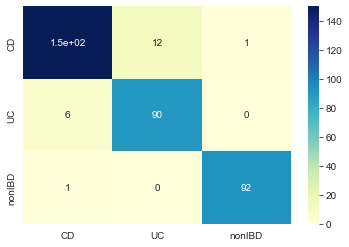

In [184]:
n_estimators_RF = [50, 100, 250, 500, 1000]
max_features_RF = [ None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=2, random_state=0)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring="roc_auc")

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_RF = confusion_matrix(y_test, RF_predictions,labels=labels)
cm_RF = pd.DataFrame(cm_RF, index=labels, columns=labels)
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packag

Best Model:
MLPClassifier(alpha=0.1, hidden_layer_sizes=(10, 10), random_state=1,
              solver='lbfgs')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

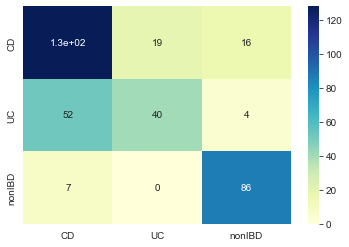

In [185]:
alpha_MLP = [i for i in 10.0 ** -np.arange(1,7)]
hidden_layer_sizes_MLP = [(10,10), (20,20), (40,40),
                     (10,20),(10,40),(20,10), (40,10)]
parameters_MLP = {'alpha': alpha_MLP,
                 'hidden_layer_sizes': hidden_layer_sizes_MLP}

MLP_model = MLPClassifier(solver='lbfgs',
                    random_state=1)
MLP_clf = GridSearchCV(MLP_model, parameters_MLP, cv=5, scoring="roc_auc")

MLP_clf.fit(X_train, y_train)

print("Best Model:")
MLP_model = MLP_clf.best_estimator_
print(MLP_model)

MLP_predictions = MLP_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_MLP = confusion_matrix(y_test, MLP_predictions,labels=labels)
cm_MLP = pd.DataFrame(cm_MLP, index=labels, columns=labels)
sns.heatmap(cm_MLP, cmap="YlGnBu", annot=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packag

Best Model:
MLPClassifier(alpha=0.1, hidden_layer_sizes=(20, 100, 100, 20), random_state=1,
              solver='lbfgs')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

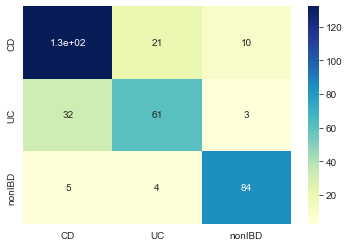

In [186]:
alpha_MLP = [i for i in 10.0 ** -np.arange(1,7)]

parameters_MLP = {'alpha': alpha_MLP}

MLP_model = MLPClassifier(solver='lbfgs',
                    random_state=1, hidden_layer_sizes=(20,100,100,20))
MLP_clf = GridSearchCV(MLP_model, parameters_MLP, cv=5, scoring="roc_auc")

MLP_clf.fit(X_train, y_train)

print("Best Model:")
MLP_model = MLP_clf.best_estimator_
print(MLP_model)

MLP_predictions = MLP_model.predict(X_test)

# creating a confusion matrix
cm_MLP = confusion_matrix(y_test, MLP_predictions)

labels = np.unique(y_test)
cm_MLP = confusion_matrix(y_test, MLP_predictions,labels=labels)
cm_MLP = pd.DataFrame(cm_MLP, index=labels, columns=labels)
sns.heatmap(cm_MLP, cmap="YlGnBu", annot=True)

In [187]:
allclf_train = pd.DataFrame({'diagnosis':y_train})

allclf_train['DT'] = DT_clf.best_estimator_.predict(X_train)
allclf_train['KNN'] = KNN_clf.best_estimator_.predict(X_train)
allclf_train['SVC'] = SVM_clf.best_estimator_.predict(X_train)
allclf_train['LR'] = LR_clf.best_estimator_.predict(X_train)
allclf_train['RF'] = RF_clf.best_estimator_.predict(X_train)
allclf_train['MLP'] = MLP_clf.best_estimator_.predict(X_train)
allclf_train

,diagnosis,DT,KNN,SVC,LR,RF,MLP
External ID,,,,,,,
CSM9X21TM1,CD,CD,CD,CD,CD,CD,CD
HSM67VHFM1,CD,CD,CD,UC,CD,CD,CD
CSM7KOTCM1,CD,UC,CD,nonIBD,nonIBD,CD,CD
PSM7J17LM,CD,CD,CD,CD,CD,CD,CD
HSMA33MKM,UC,UC,CD,CD,CD,UC,UC
...,...,...,...,...,...,...,...
HSM67VEMM1,CD,CD,CD,CD,CD,CD,CD
HSM7J4HQM1,UC,UC,UC,UC,UC,UC,UC
CSM79HLGM1,UC,UC,UC,UC,UC,UC,UC


In [188]:
allclf_test = pd.DataFrame({'diagnosis':y_test})

allclf_test['DT'] = DT_clf.best_estimator_.predict(X_test)
allclf_test['KNN'] = KNN_clf.best_estimator_.predict(X_test)
allclf_test['SVC'] = SVM_clf.best_estimator_.predict(X_test)
allclf_test['LR'] = LR_clf.best_estimator_.predict(X_test)
allclf_test['RF'] = RF_clf.best_estimator_.predict(X_test)
allclf_test['MLP'] = MLP_clf.best_estimator_.predict(X_test)

In [189]:
allclf_train['Consensus'] = allclf_train[['DT', 'KNN', 'SVC', 'LR', 'RF', 'MLP']].mode(axis=1).iloc[:,0]
allclf_test['Consensus'] = allclf_test[['DT', 'KNN', 'SVC', 'LR', 'RF', 'MLP']].mode(axis=1).iloc[:,0]

In [190]:
cm_Consensus_train = confusion_matrix(y_train, allclf_train['Consensus'])
cm_Consensus_test = confusion_matrix(y_test, allclf_test['Consensus'])

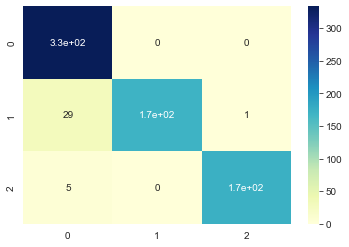

In [191]:
sns.heatmap(cm_Consensus_train, cmap="YlGnBu", annot=True)
plt.show()

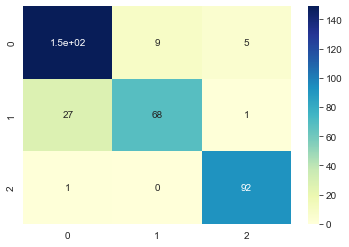

In [192]:
sns.heatmap(cm_Consensus_test, cmap="YlGnBu", annot=True)
plt.show()

In [193]:
allclf_test.shape

(352, 8)

In [303]:
validation_metric = pd.DataFrame(columns = ['roc_auc_score'])
validation_metric['Model'] = ( 'DT', 'KNN', 'SVC', 'LR','RF','MLP')
validation_metric.set_index('Model',inplace=True)

In [301]:

# print(f'{round(roc_auc_score(y_test, DT_clf.predict_proba(X_test), multi_class="ovr")*100,2)}%')
#
# print(roc_auc_score(y_test, DT_clf.predict_proba(X_test), multi_class='ovr'))
# print(roc_auc_score(y_test, KNN_clf.predict_proba(X_test), multi_class='ovr'))
# # print(roc_auc_score(y_test, SVM_clf.predict_proba(X_test), multi_class='ovr'))
# print(roc_auc_score(y_test, LR_clf.predict_proba(X_test), multi_class='ovr'))
# print(roc_auc_score(y_test, RF_clf.predict_proba(X_test), multi_class='ovr'))
# print(roc_auc_score(y_test, MLP_clf.predict_proba(X_test), multi_class='ovr'))
validation_metric= round(roc_auc_score(y_test, DT_clf.predict_proba(X_test), multi_class="ovr")*100,2)
# validation_metric['KNN'] = KNN_clf.best_estimator_.predict(X_test)
# validation_metric['SVC'] = SVM_clf.best_estimator_.predict(X_test)
# validation_metric['LR'] = LR_clf.best_estimator_.predict(X_test)
# validation_metric['RF'] = RF_clf.best_estimator_.predict(X_test)
# validation_metric['MLP'] = MLP_clf.best_estimator_.predict(X_test)

TypeError: 'numpy.float64' object does not support item assignment

In [304]:
validation_metric

,roc_auc_score
Model,
DT,NaN
KNN,NaN
SVC,NaN
LR,NaN
RF,NaN
MLP,NaN
